<a href="https://colab.research.google.com/github/claredavies/DataScienceCoursework/blob/master/StudentGradePredictionCoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports & Loading CSV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import io
from google.colab import files

data_to_load_students = files.upload()
std = pd.read_csv(io.BytesIO(data_to_load_students['DataCoursework2.csv']))
std.head(3)

Saving DataCoursework2.csv to DataCoursework2.csv


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.0,21.88,5.0,5.0,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.0,22.27,5.0,4.0,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.0,27.05,2.5,5.0,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3


Data Exploration

Shape of Dataset:   (107, 48)


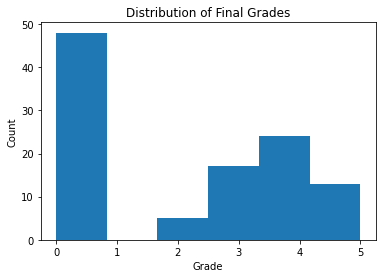

<Figure size 432x288 with 0 Axes>

In [2]:

print("Shape of Dataset:   " + str(std.shape))

# Histogram of grades
plt.hist(std['Grade'], bins = 6)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')
plt.show()
plt.clf()

Find High Correlation Features

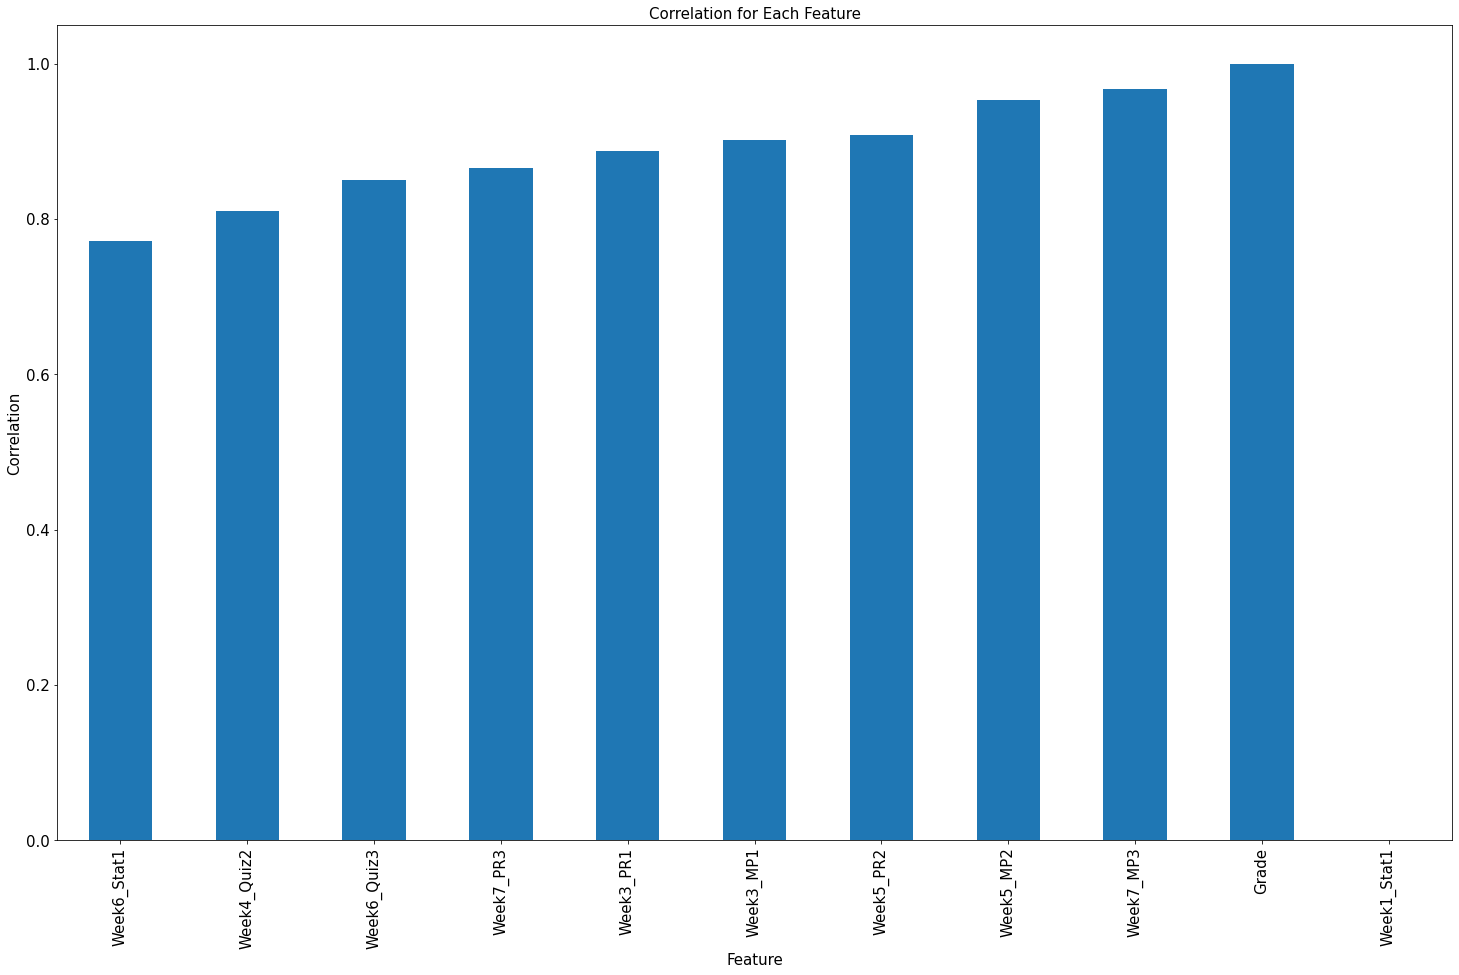

In [3]:
std_features_keep = std.drop(['Week8_Total'],axis=1)

# Create correlation matrix
corr_matrix = std_features_keep.corr()['Grade'].sort_values()
threshold = 0.7

for  i, v in corr_matrix.iteritems():
    if(v < threshold):
      std_features_keep = std_features_keep.drop(i, axis=1)
  
# Plot for correlation
SMALL_SIZE = 15
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
std_plot = (std_features_keep.corr()['Grade'].sort_values()).plot(kind="bar",figsize=(25,15))
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation for Each Feature')
plt.show()

# Make sure std_features_keep are in order according to correlation
ix = std_features_keep.corr().sort_values('Grade', ascending=False).index
std_features_keep = std_features_keep.loc[:, ix]
std_features_keep = std_features_keep.drop(['Grade'], axis=1)

Random Forest

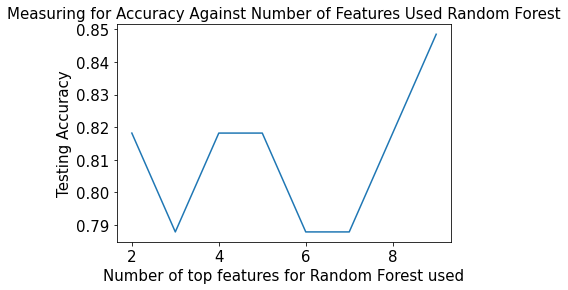

Max accuracy is using the top 9  features which has an accuracy of  : 0.8484848484848485
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           2       0.00      0.00      0.00         2
           3       0.67      0.57      0.62         7
           4       0.62      1.00      0.77         5
           5       1.00      1.00      1.00         1

    accuracy                           0.85        33
   macro avg       0.66      0.71      0.68        33
weighted avg       0.81      0.85      0.82        33



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

max_accuracy_random_forrest = 0
max_index_random_forrest = 0
scores = {}
scores_list = []
y_pred_max = 0
range_allowed = range(2,len(std_features_keep.columns))

for x in range_allowed:
  X = std_features_keep.iloc[:, :x]
  y= std['Grade']
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1) # 70% training and 30% test

  #Create a Gaussian Classifier
  clf=RandomForestClassifier(n_estimators=100)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
  scores[x] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(scores[x])
  if(scores[x] > max_accuracy_random_forrest):
    max_accuracy_random_forrest = scores[x]
    max_index_random_forrest = x
    y_pred_max = y_pred

plt.clf()
plt.plot(range_allowed,scores_list)
plt.xlabel("Number of top features for Random Forest used")
plt.ylabel("Testing Accuracy")
plt.title('Measuring for Accuracy Against Number of Features Used Random Forest')
plt.show()

# Model Accuracy, how often is the classifier correct?
print("Max accuracy is using the top " + str(max_index_random_forrest) + "  features which has an accuracy of  : " + str(max_accuracy_random_forrest))
print(classification_report(y_test, y_pred_max))

K-Nearest Neighbour

Max accuracy is using the top 6  features which has an accuracy of  : 0.9545454545454546


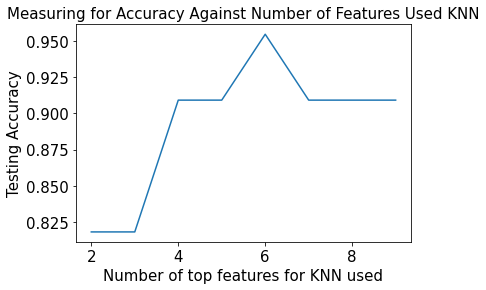

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1

    accuracy                           0.95        22
   macro avg       0.75      0.80      0.77        22
weighted avg       0.92      0.95      0.94        22


Max accuracy is using the top 6 feautures with k of :  5  which gives accuracy of  0.9545454545454546


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


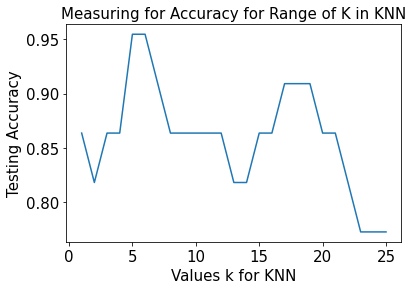

In [5]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# ///////////////////////////////////////////
# Choosing number of features
max_accuracy_knn_features = 0
max_index_knn_features = 0
scores = {}
scores_list = []
range_allowed = range(2,len(std_features_keep.columns))

for x in range_allowed:
  X = std_features_keep.iloc[:, :x]
  y= std['Grade']
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) # 70% training and 30% test
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  knn = KNeighborsClassifier(n_neighbors=5) 
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[x] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(scores[x])
  if(scores[x] > max_accuracy_knn_features):
    max_index_knn_features = x
    max_accuracy_knn_features = scores[x]

print("Max accuracy is using the top " + str(max_index_knn_features) + "  features which has an accuracy of  : " + str(max_accuracy_knn_features))

plt.clf()
plt.plot(range_allowed,scores_list)
plt.xlabel("Number of top features for KNN used")
plt.ylabel("Testing Accuracy")
plt.title('Measuring for Accuracy Against Number of Features Used KNN')
plt.show()

# ///////////////////////////////////////////
# Choosing number for K

X = std_features_keep.iloc[:, :max_index_knn_features]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) # 80% training and 20% test

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_range = range(1,26)
scores = {}
scores_list = []
max_score = 0.00
max_k = 1
y_pred_max = 0

for k in k_range:
      knn = KNeighborsClassifier(n_neighbors=k) 
      knn.fit(X_train, y_train)
      y_pred = knn.predict(X_test)
      scores[k] = metrics.accuracy_score(y_test, y_pred)
      scores_list.append(scores[k])
      if scores[k] > max_score:
        max_k = k
        max_score = scores[k]
        y_pred_max = y_pred
        

print(classification_report(y_test, y_pred_max))

plt.clf()
plt.plot(k_range,scores_list)
plt.xlabel("Values k for KNN")
plt.ylabel("Testing Accuracy")
plt.title('Measuring for Accuracy for Range of K in KNN')

knn_accuracy_score =  max_score

print()# Printing new line
print("Max accuracy is using the top " + str(max_index_knn_features) + " feautures with k of :  " + str(max_k) + "  which gives accuracy of  " + str(knn_accuracy_score))

Comparing the 2 Classifiers

<Figure size 432x288 with 0 Axes>

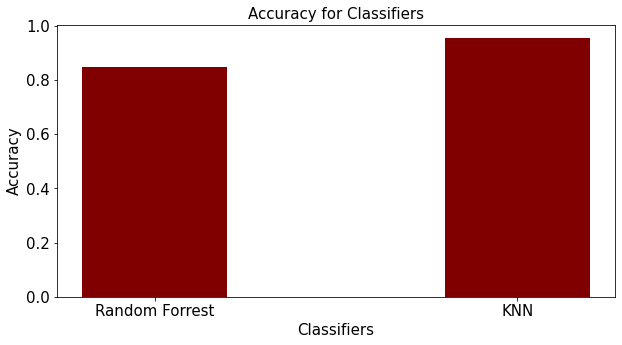

In [6]:
data = {'Random Forrest':max_accuracy_random_forrest, 'KNN':knn_accuracy_score}
classifier = list(data.keys())
accuracy = list(data.values())
  
plt.clf()
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(classifier, accuracy, color ='maroon',width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy for Classifiers")
plt.show()
 